<a href="https://colab.research.google.com/github/marjanfah/tamrin-5-bigdata/blob/main/tamrin5_traintest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [73]:
import csv

with open("/content/gdrive/My Drive/diabetic_data2.csv", 'r') as f:
    reader = csv.reader(f)
    headers = next(reader)
    num_cols = len(headers)

print(f'The number of columns in the file is {num_cols}.')


The number of columns in the file is 40.


In [74]:
import pandas as pd
# Read the CSV file

df = pd.read_csv("/content/gdrive/My Drive/diabetic_data2.csv")

# Display the dataframe
#print(df)
#print(df.dtypes)

In [75]:
# Handle missing values
df = df.replace('?', pd.NA)
df = df.dropna()


In [76]:
# Display null values in the DataFrame
null_values = df[df.isnull().any(axis=1)]
print(null_values)

Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide_metformin, glipizide_metformin, glimepiride_pioglitazone, metformin_rosiglitazone, metformin_pioglitazone, change, diabetesMed]
Index: []

[0 rows x 40 columns]


In [77]:
# Remove columns
df = df.drop(['payer_code','weight', 'medical_specialty'], axis=1)

In [78]:
# Define the first and last column names to delete
first_column = 'glyburide_metformin'
last_column = 'metformin_pioglitazone'

# Get the index positions of the first and last columns
start_idx = df.columns.get_loc(first_column)
end_idx = df.columns.get_loc(last_column)

# Delete the specified columns
df = df.drop(df.columns[start_idx:end_idx + 1], axis=1)

# Display the updated DataFrame
print("\nDataFrame after deleting columns:")
print(df)


DataFrame after deleting columns:
       encounter_id  patient_nbr       race  gender       age  \
14497     101093220     91503747  Caucasian  Female   [40-50)   
14505     101131332     59484456  Caucasian  Female   [40-50)   
14522     101178018     75963663  Caucasian  Female   [80-90)   
14615     101385078     59722938  Caucasian  Female   [80-90)   
14639     101487132     69795441  Caucasian    Male   [80-90)   
...             ...          ...        ...     ...       ...   
70256     352530032     69640065  Caucasian  Female   [50-60)   
70259     352559474     80873244  Caucasian    Male  [90-100)   
70361     353773754    104956029  Caucasian    Male   [40-50)   
70563     356721092     61696620  Caucasian    Male   [70-80)   
70644     358370384     60750342  Caucasian  Female   [60-70)   

       time_in_hospital  num_lab_procedures  num_medications  \
14497                 1                  53                6   
14505                 2                  54             

In [79]:
# Define the first and last column names to delete
first_column = 'metformin'
last_column = 'citoglipton'

# Get the index positions of the first and last columns
start_idx = df.columns.get_loc(first_column)
end_idx = df.columns.get_loc(last_column)

# Delete the specified columns
df = df.drop(df.columns[start_idx:end_idx + 1], axis=1)

# Display the updated DataFrame
print("\nDataFrame after deleting columns:")
print(df)


DataFrame after deleting columns:
       encounter_id  patient_nbr       race  gender       age  \
14497     101093220     91503747  Caucasian  Female   [40-50)   
14505     101131332     59484456  Caucasian  Female   [40-50)   
14522     101178018     75963663  Caucasian  Female   [80-90)   
14615     101385078     59722938  Caucasian  Female   [80-90)   
14639     101487132     69795441  Caucasian    Male   [80-90)   
...             ...          ...        ...     ...       ...   
70256     352530032     69640065  Caucasian  Female   [50-60)   
70259     352559474     80873244  Caucasian    Male  [90-100)   
70361     353773754    104956029  Caucasian    Male   [40-50)   
70563     356721092     61696620  Caucasian    Male   [70-80)   
70644     358370384     60750342  Caucasian  Female   [60-70)   

       time_in_hospital  num_lab_procedures  num_medications  \
14497                 1                  53                6   
14505                 2                  54             

In [80]:
# String to Numerical:
race_map = {'Caucasian': 0, 'AfricanAmerican': 1, 'Hispanic': 2, 'Asian': 3, 'Other': 4}
gender_map = {'Female': 0, 'Male': 1}
A1Cresult_map = {'None': 0, 'Norm': 1, '>8': 2, '>7': 3}
insulin_map = {'No':0 , 'Steady':1, 'Down': 2, 'Up': 3}
change_map = {'No':0 , 'Ch':1}
diabetesMed_map = {'No':0 , 'Yes':1}
age_map = {'[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, '[40-50)': 4, '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, '[80-90)': 8,'[90-100)': 9}

df['age'] = df['age'].map(age_map)
df['race'] = df['race'].map(race_map)
df['gender'] = df['gender'].map(gender_map)
df['A1Cresult'] = df['A1Cresult'].map(A1Cresult_map)
df['insulin'] = df['insulin'].map(insulin_map)
df['change'] = df['change'].map(change_map)
df['diabetesMed'] = df['diabetesMed'].map(diabetesMed_map)

In [81]:
print(df.dtypes)

encounter_id          int64
patient_nbr           int64
race                  int64
gender                int64
age                   int64
time_in_hospital      int64
num_lab_procedures    int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
A1Cresult             int64
insulin               int64
change                int64
diabetesMed           int64
dtype: object


In [83]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


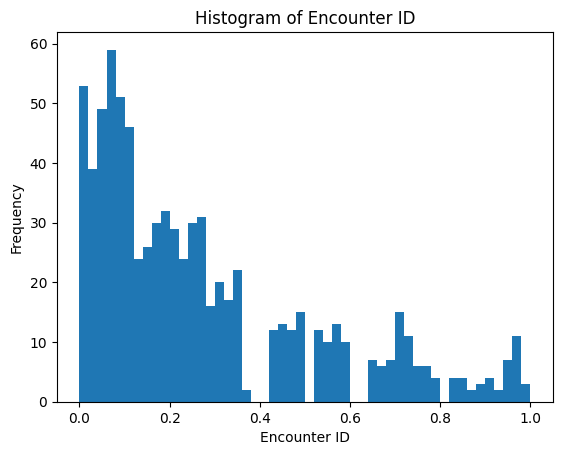

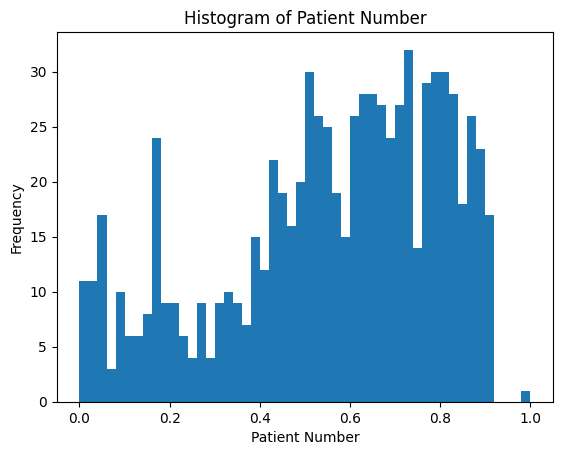

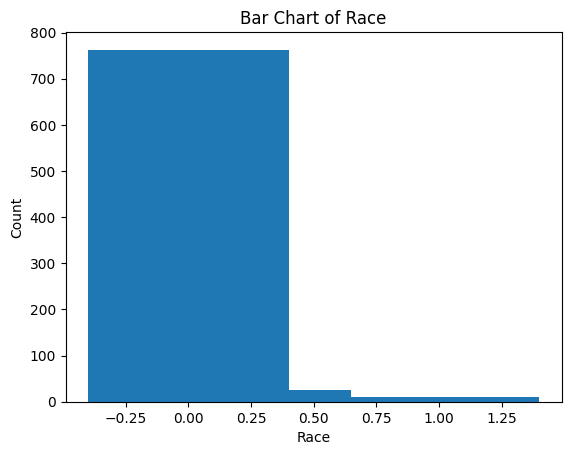

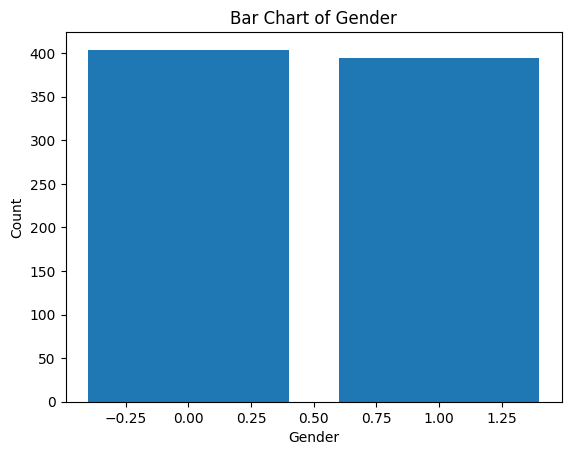

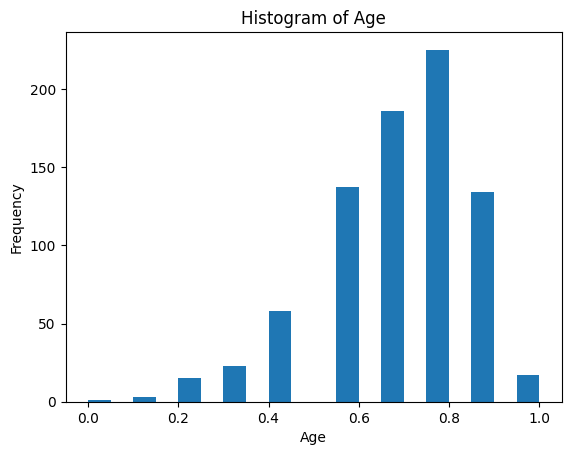

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data

# Histogram for 'encounter_id'
plt.hist(df['encounter_id'], bins=50)
plt.xlabel('Encounter ID')
plt.ylabel('Frequency')
plt.title('Histogram of Encounter ID')
plt.show()

# Histogram for 'patient_nbr'
plt.hist(df['patient_nbr'], bins=50)
plt.xlabel('Patient Number')
plt.ylabel('Frequency')
plt.title('Histogram of Patient Number')
plt.show()

# Bar chart for 'race'
race_counts = df['race'].value_counts()
plt.bar(race_counts.index, race_counts.values)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Bar Chart of Race')
plt.show()

# Bar chart for 'gender'
gender_counts = df['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Chart of Gender')
plt.show()

# Histogram for 'age'
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()


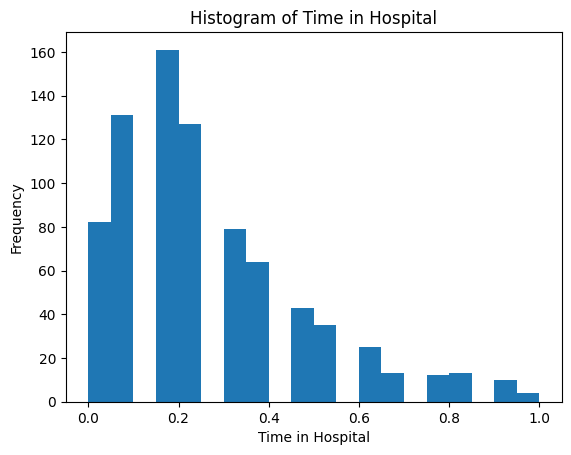

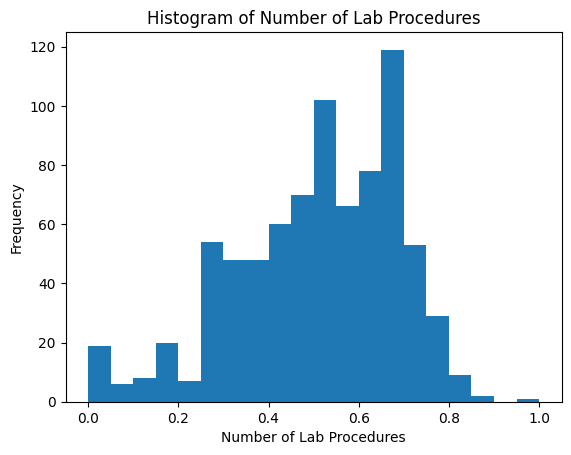

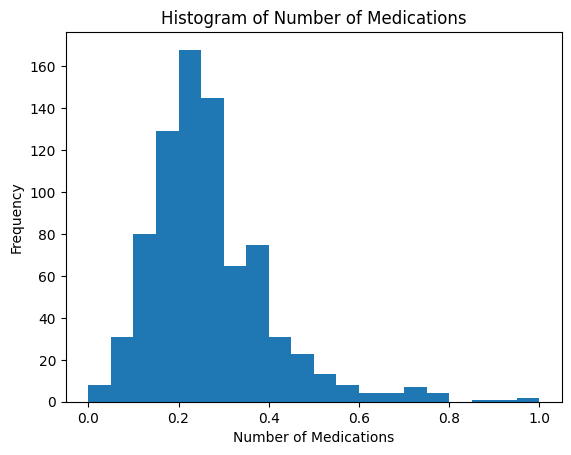

In [85]:
# Histogram for 'time_in_hospital'
plt.hist(df['time_in_hospital'], bins=20)
plt.xlabel('Time in Hospital')
plt.ylabel('Frequency')
plt.title('Histogram of Time in Hospital')
plt.show()

# Histogram for 'num_lab_procedures'
plt.hist(df['num_lab_procedures'], bins=20)
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Lab Procedures')
plt.show()

# Histogram for 'num_medications'
plt.hist(df['num_medications'], bins=20)
plt.xlabel('Number of Medications')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Medications')
plt.show()


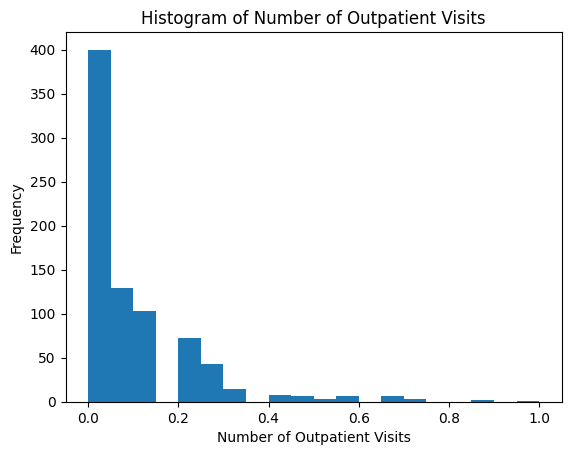

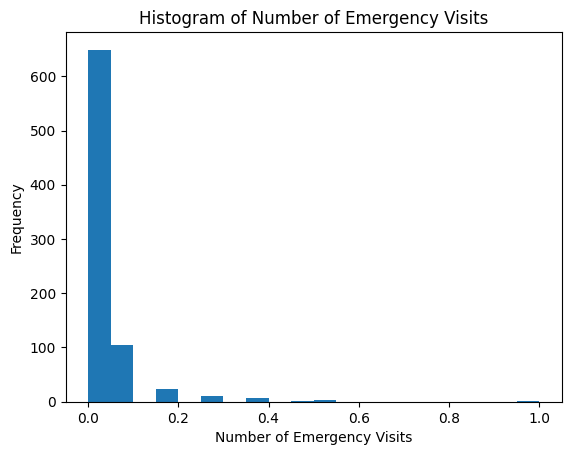

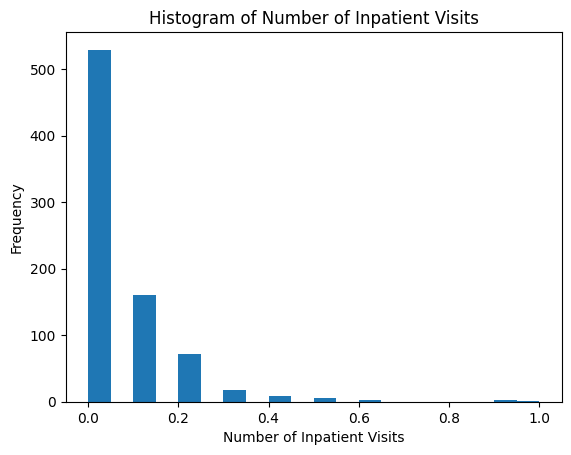

In [86]:
# Histogram for 'number_outpatient'
plt.hist(df['number_outpatient'], bins=20)
plt.xlabel('Number of Outpatient Visits')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Outpatient Visits')
plt.show()

# Histogram for 'number_emergency'
plt.hist(df['number_emergency'], bins=20)
plt.xlabel('Number of Emergency Visits')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Emergency Visits')
plt.show()

# Histogram for 'number_inpatient'
plt.hist(df['number_inpatient'], bins=20)
plt.xlabel('Number of Inpatient Visits')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Inpatient Visits')
plt.show()


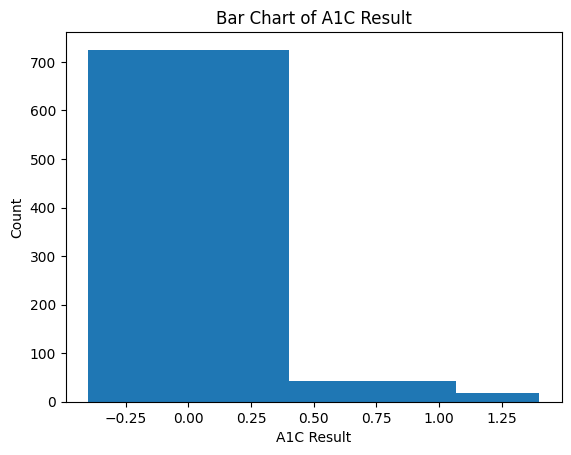

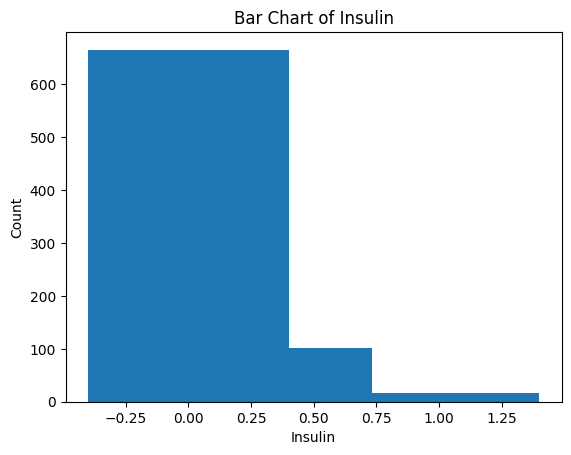

In [87]:
# Bar chart for 'A1Cresult'
a1c_counts = df['A1Cresult'].value_counts()
plt.bar(a1c_counts.index, a1c_counts.values)
plt.xlabel('A1C Result')
plt.ylabel('Count')
plt.title('Bar Chart of A1C Result')
plt.show()

# Bar chart for 'insulin'
insulin_counts = df['insulin'].value_counts()
plt.bar(insulin_counts.index, insulin_counts.values)
plt.xlabel('Insulin')
plt.ylabel('Count')
plt.title('Bar Chart of Insulin')
plt.show()



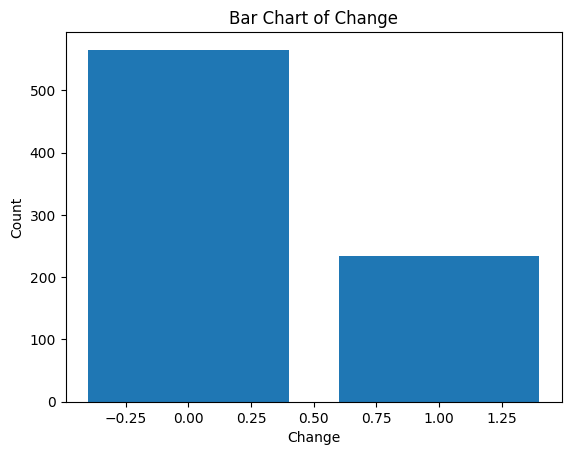

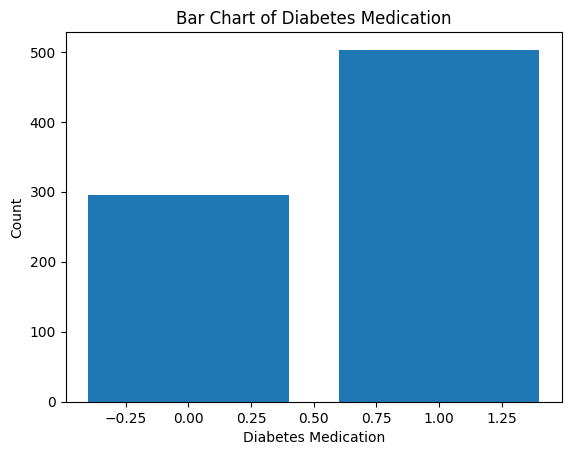

In [88]:
# Bar chart for 'change'
change_counts = df['change'].value_counts()
plt.bar(change_counts.index, change_counts.values)
plt.xlabel('Change')
plt.ylabel('Count')
plt.title('Bar Chart of Change')
plt.show()

# Bar chart for 'diabetesMed'
diabetes_med_counts = df['diabetesMed'].value_counts()
plt.bar(diabetes_med_counts.index, diabetes_med_counts.values)
plt.xlabel('Diabetes Medication')
plt.ylabel('Count')
plt.title('Bar Chart of Diabetes Medication')
plt.show()


In [89]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import MinMaxScaler

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'df'
# Assuming 'numeric_data' contains the numeric columns for vector assembly
numeric_data = df[['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_outpatient',
                   'number_emergency', 'number_inpatient']]


# Split the data into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=40)

# Perform vector assembly on the numeric columns
vector_col = 'features'
assembler = StandardScaler()
train_data = assembler.fit_transform(train_data[numeric_data.columns])
test_data = assembler.transform(test_data[numeric_data.columns])

# Continue with your code for further operations
import pandas as pd

# Convert the NumPy array to a DataFrame
train_data = pd.DataFrame(train_data)

# Continue with your code for further operations
column_names = train_data.columns
print(column_names)

RangeIndex(start=0, stop=6, step=1)


In [91]:
print(train_data)

            0         1         2         3         4         5
0   -0.503462  1.025929 -0.703859 -0.656121 -0.361338 -0.517759
1    0.942436  0.541280  1.659873 -0.656121 -0.361338  0.364503
2    1.665386  1.779827  1.659873 -0.656121 -0.361338 -0.517759
3   -0.864937  0.056631 -0.178585 -0.656121 -0.361338 -0.517759
4   -0.503462  0.810529 -0.441222  0.709551 -0.361338 -0.517759
..        ...       ...       ...       ...       ...       ...
634 -0.503462 -1.935815 -0.441222 -0.200897 -0.361338 -0.517759
635 -0.503462  0.325880 -1.229133 -0.656121  2.019025 -0.517759
636  0.219487  0.595130 -0.966496 -0.656121 -0.361338 -0.517759
637 -0.503462  0.972079  0.346689  0.254327 -0.361338 -0.517759
638 -1.226412  0.218181 -1.623088  2.075222  4.399388  0.364503

[639 rows x 6 columns]


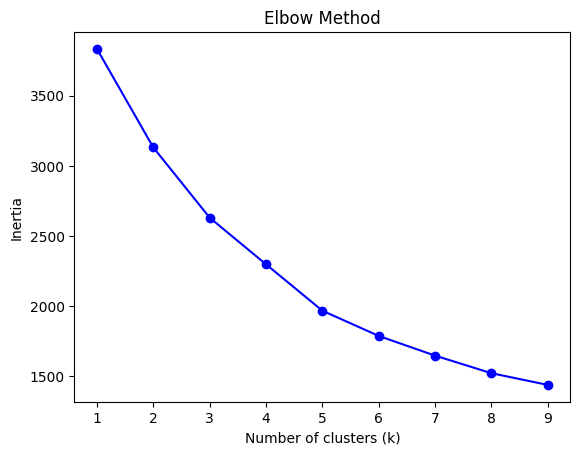

In [92]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming train_data is the scaled training data from the code snippet provided

inertia = []
k_values = range(1, 10)  # Test different values of k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42 , n_init=10)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)

# Plot the results
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [93]:
import pandas as pd
from sklearn.cluster import KMeans

# Create the DataFrame
data = train_data

# Perform K-means clustering
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Assign cluster labels to the original DataFrame
data['cluster_label'] = kmeans.labels_

# Print the resulting clusters
print(data)


            0         1         2         3         4         5  cluster_label
0   -0.503462  1.025929 -0.703859 -0.656121 -0.361338 -0.517759              0
1    0.942436  0.541280  1.659873 -0.656121 -0.361338  0.364503              3
2    1.665386  1.779827  1.659873 -0.656121 -0.361338 -0.517759              3
3   -0.864937  0.056631 -0.178585 -0.656121 -0.361338 -0.517759              0
4   -0.503462  0.810529 -0.441222  0.709551 -0.361338 -0.517759              0
..        ...       ...       ...       ...       ...       ...            ...
634 -0.503462 -1.935815 -0.441222 -0.200897 -0.361338 -0.517759              2
635 -0.503462  0.325880 -1.229133 -0.656121  2.019025 -0.517759              0
636  0.219487  0.595130 -0.966496 -0.656121 -0.361338 -0.517759              0
637 -0.503462  0.972079  0.346689  0.254327 -0.361338 -0.517759              0
638 -1.226412  0.218181 -1.623088  2.075222  4.399388  0.364503              1

[639 rows x 7 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


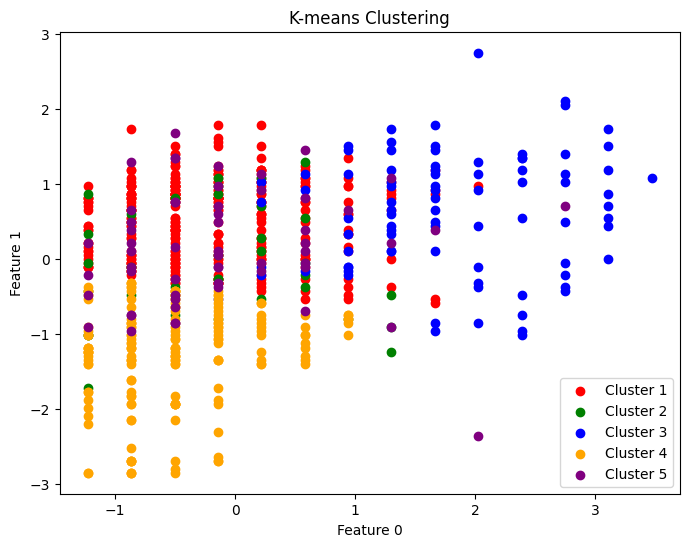

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create the DataFrame
data = train_data

# Convert column names to strings
data.columns = data.columns.astype(str)

# Perform K-means clustering
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Assign cluster labels to the original DataFrame
data['cluster_label'] = kmeans.labels_

# Define colors for each cluster
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_data = data[data['cluster_label'] == i]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], color=colors[i], label=f'Cluster {i+1}')

plt.title('K-means Clustering')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()


In [95]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create the DataFrame
data = train_data

# Perform K-means clustering
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Assign cluster labels to the original DataFrame
data['cluster_label'] = kmeans.labels_

# Evaluate clustering using Silhouette coefficient
silhouette_avg = silhouette_score(data, kmeans.labels_)
print(f"Silhouette coefficient: {silhouette_avg}")

# Evaluate clustering using another arbitrary criterion (e.g., inertia)
inertia = kmeans.inertia_
print(f"Arbitrary criterion (Inertia): {inertia}")


Silhouette coefficient: 0.31027648472684616
Arbitrary criterion (Inertia): 1967.4027129944102


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [96]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Create the DataFrame
data = train_data

# Perform hierarchical clustering
n_clusters = 5
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clustering.fit(data)

# Assign cluster labels to the original DataFrame
data['cluster_label'] = agg_clustering.labels_

# Print the resulting clusters
print(data)


            0         1         2         3         4         5  cluster_label
0   -0.503462  1.025929 -0.703859 -0.656121 -0.361338 -0.517759              1
1    0.942436  0.541280  1.659873 -0.656121 -0.361338  0.364503              2
2    1.665386  1.779827  1.659873 -0.656121 -0.361338 -0.517759              2
3   -0.864937  0.056631 -0.178585 -0.656121 -0.361338 -0.517759              1
4   -0.503462  0.810529 -0.441222  0.709551 -0.361338 -0.517759              1
..        ...       ...       ...       ...       ...       ...            ...
634 -0.503462 -1.935815 -0.441222 -0.200897 -0.361338 -0.517759              3
635 -0.503462  0.325880 -1.229133 -0.656121  2.019025 -0.517759              1
636  0.219487  0.595130 -0.966496 -0.656121 -0.361338 -0.517759              1
637 -0.503462  0.972079  0.346689  0.254327 -0.361338 -0.517759              1
638 -1.226412  0.218181 -1.623088  2.075222  4.399388  0.364503              0

[639 rows x 7 columns]


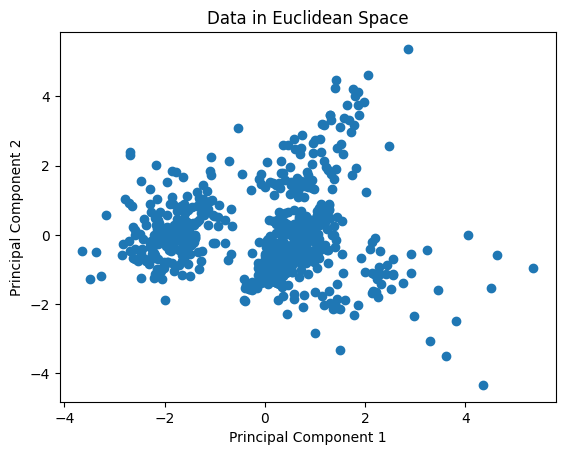

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create the DataFrame
data = train_data

# Perform PCA with k=5 features
k = 5
pca = PCA(n_components=k)
reduced_data = pca.fit_transform(data)

# Plot the reduced data in Euclidean space
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data in Euclidean Space')
plt.show()


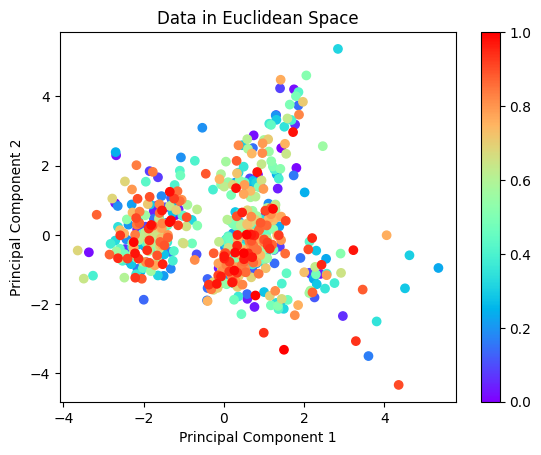

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Create the DataFrame
data = train_data

# Perform PCA with k=5 features
k = 5
pca = PCA(n_components=k)
reduced_data = pca.fit_transform(data)

# Generate distinct colors for each data point
n_data_points = reduced_data.shape[0]
colors = np.linspace(0, 1, n_data_points)

# Plot the reduced data in Euclidean space with distinct colors
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data in Euclidean Space')
plt.colorbar()
plt.show()
